In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_file_path = '/content/drive/MyDrive/dataset_backup/indian_surrency_dataset_backup.zip'  # Update this path
destination_folder = '/content/dataset'
import zipfile
import os
os.makedirs(destination_folder, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)
print(f"Dataset unzipped successfully to: {destination_folder}")

Dataset unzipped successfully to: /content/dataset


In [ ]:
#to delete unwanted folders
import shutil
# Path to the folder you want to delete
folder_path = '/content/dataset/Indian currency dataset v1/validation/Background'
# Delete the folder
try:
    shutil.rmtree(folder_path)
    print(f"Folder '{folder_path}' has been deleted.")
except FileNotFoundError:
    print(f"Folder '{folder_path}' not found.")
except Exception as e:
    print(f"Error deleting folder '{folder_path}': {e}")

Folder '/content/dataset/Indian currency dataset v1/validation/Background' has been deleted.


In [ ]:
#to create and save backup to drive
import shutil
from google.colab import drive
drive.mount('/content/drive')

# Paths
dataset_path = '/content/dataset'  # Path to your dataset in Colab
zip_path = '/content/dataset.zip'  # Temporary ZIP file in Colab
drive_save_path = '/content/drive/MyDrive/dataset_backup/indian_surrency_dataset_backup.zip'  # Desired path in Google Drive

# Create a ZIP file of the dataset
shutil.make_archive('/content/dataset', 'zip', dataset_path)
print(f"Dataset zipped successfully: {zip_path}")

# Move the ZIP file to Google Drive
shutil.move(zip_path, drive_save_path)
print(f"Dataset has been saved to Google Drive at: {drive_save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset zipped successfully: /content/dataset.zip
Dataset has been saved to Google Drive at: /content/drive/MyDrive/dataset_backup/indian_surrency_dataset_backup.zip


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to dataset
train_dir = '/content/dataset/Indian currency dataset v1/training'
val_dir = '/content/dataset/Indian currency dataset v1/validation'

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)


Found 2735 images belonging to 6 classes.
Found 270 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the MobileNetV2 model, pretrained on ImageNet, without the top layers
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model layers to prevent updating their weights during training
base_model.trainable = False

# Define the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')  # 6 classes for ₹10, ₹20, ₹50, ₹100, ₹200, ₹500
])

# Compile the model with Adam optimizer and sparse categorical cross-entropy loss
optimizer = Adam(learning_rate=0.0001)  # Lower learning rate for stability
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load training and validation data
train_data = train_datagen.flow_from_directory(
    '/content/dataset/Indian currency dataset v1/training',  # Replace with the correct path
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

val_data = val_datagen.flow_from_directory(
    '/content/dataset/Indian currency dataset v1/validation',  # Replace with the correct path
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,  # Increased epochs
    callbacks=[early_stopping, reduce_lr]
)

Found 2735 images belonging to 6 classes.
Found 270 images belonging to 6 classes.
Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 267s 3s/step - accuracy: 0.4172 - loss: 1.8184 - val_accuracy: 0.6556 - val_loss: 0.9658 - learning_rate: 1.0000e-04
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 0.6868 - loss: 0.8313 - val_accuracy: 0.6926 - val_loss: 0.7820 - learning_rate: 1.0000e-04
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.7494 - loss: 0.6637 - val_accuracy: 0.7630 - val_loss: 0.5885 - learning_rate: 1.0000e-04
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 0.7971 - loss: 0.5851 - val_accuracy: 0.7519 - val_loss: 0.7422 - learning_rate: 1.0000e-04
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 242s 3s/step - accuracy: 0.8179 - loss: 0.5127 - val_accuracy: 0.7778 - val_loss: 0.5739 - learning_rate: 1.0000e-04
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.8606 - loss: 0.4084 - val_accuracy: 0.7815 - val_loss: 0.5554 - learning_rate

In [ ]:
model.save('/content/drive/MyDrive/currency_counter.keras')

In [ ]:
model.save('currency_counter.keras')
model = tf.keras.models.load_model('currency_counter.keras')

In [ ]:
from google.colab import files
files.download('/content/currency_counter.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('/content/currency_counter.keras')

In [ ]:
from google.colab import drive
import tensorflow as tf

drive.mount('/content/drive')
model_path = '/content/drive/MyDrive/currency_counter.keras'
model = tf.keras.models.load_model(model_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


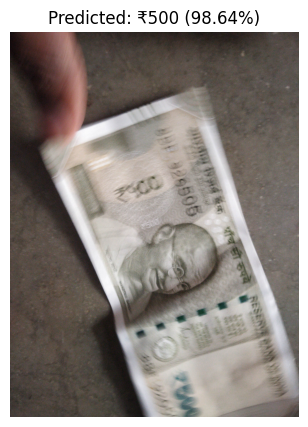

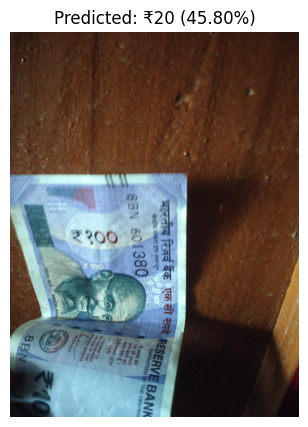

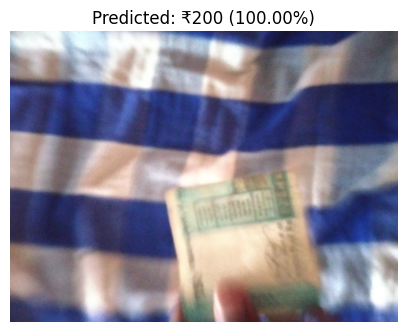

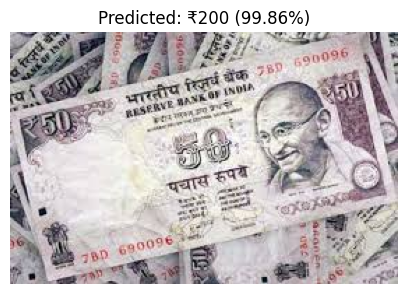

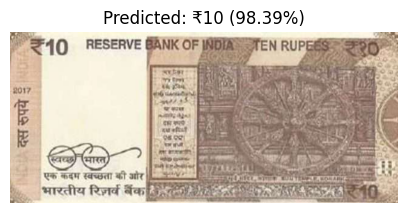

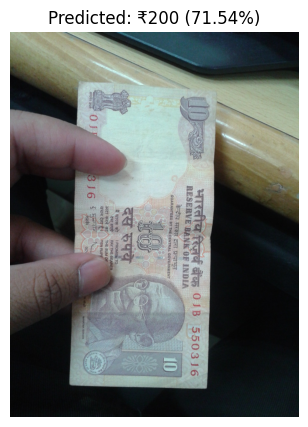

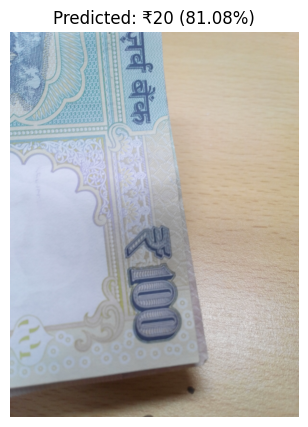

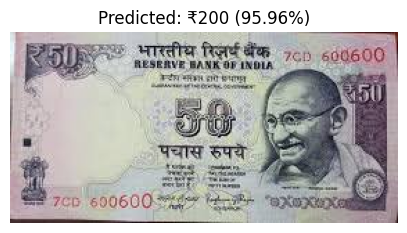

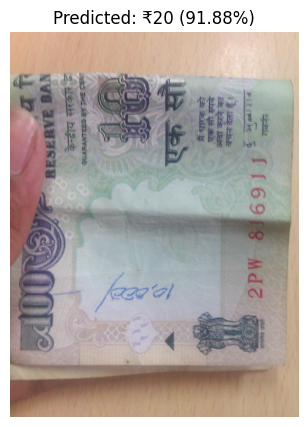

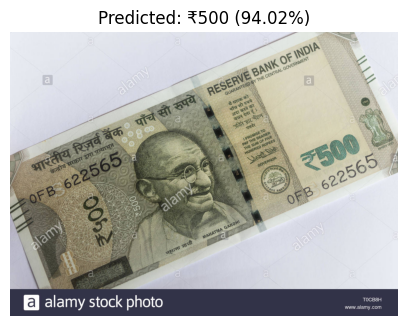

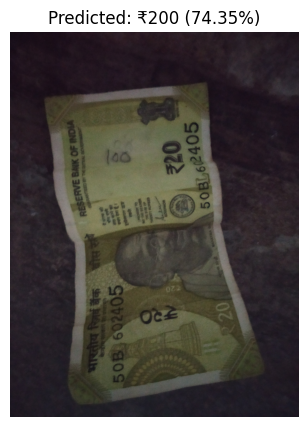

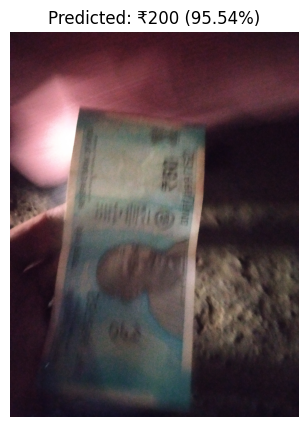

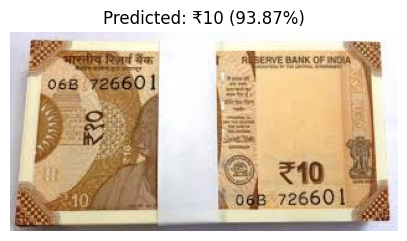

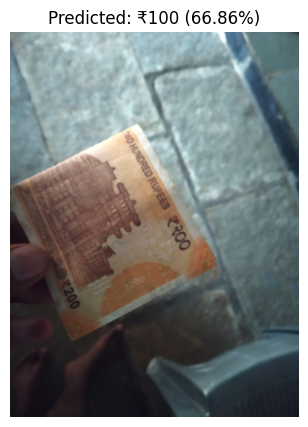

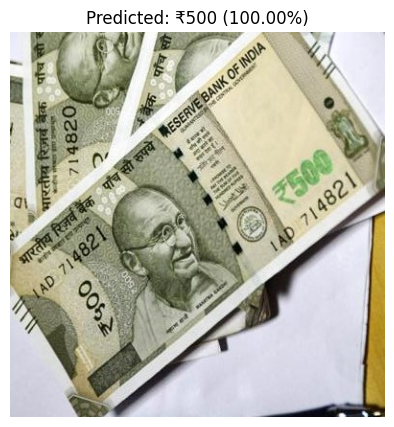

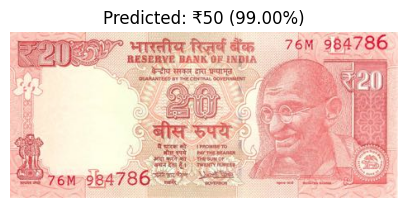

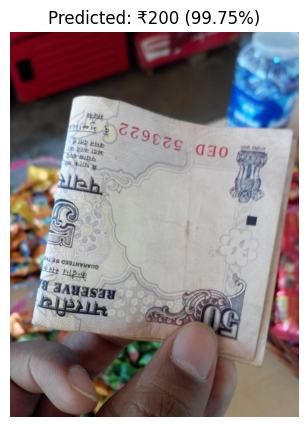

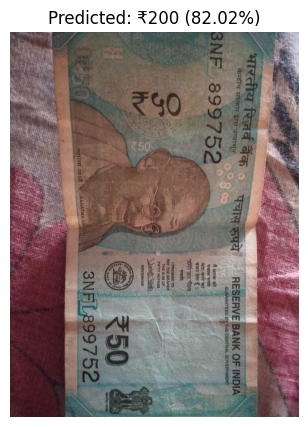

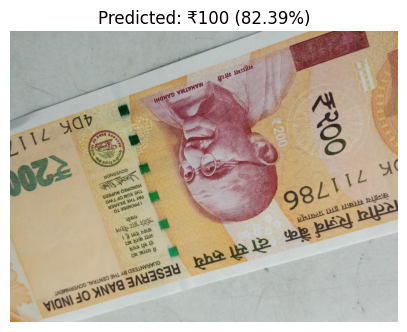

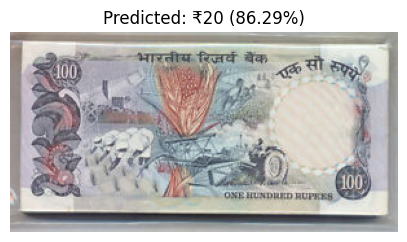

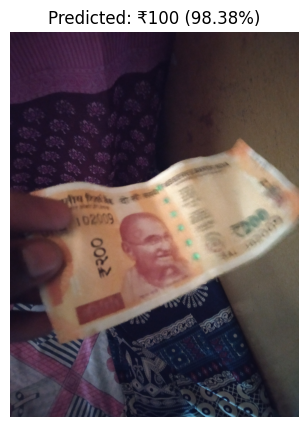

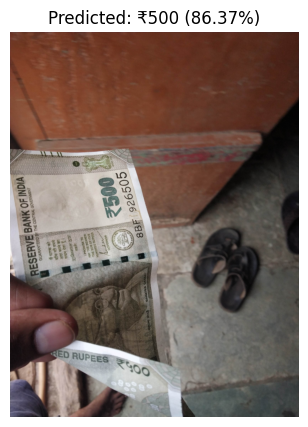

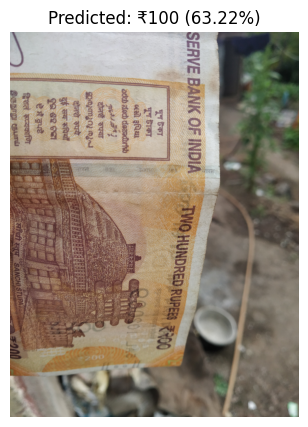

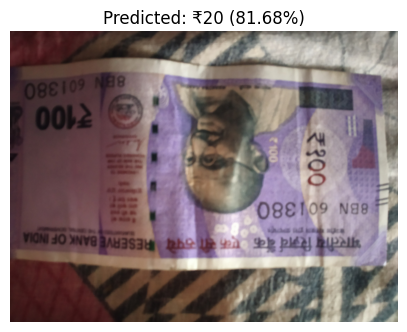

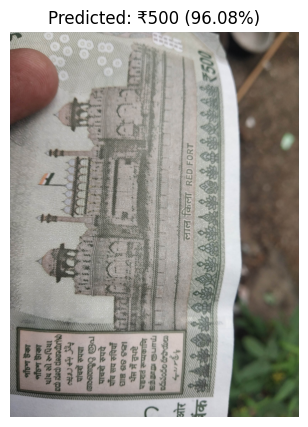

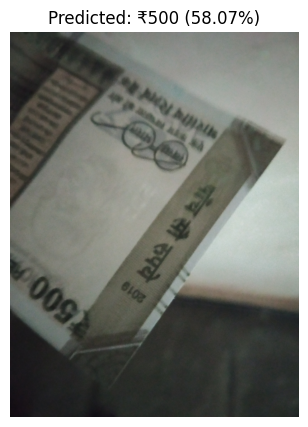

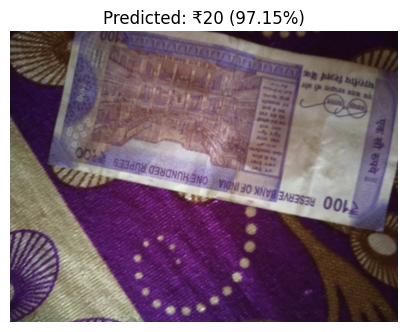

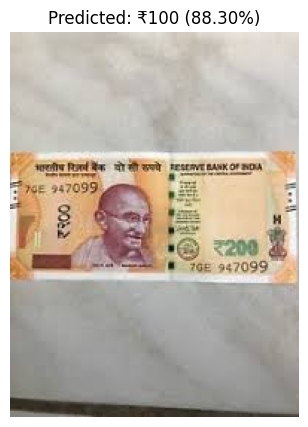

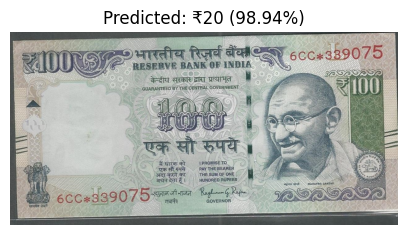

KeyboardInterrupt: 

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('currency_counter.keras')

# Class labels (map index to currency denomination)
class_labels = {0: 10, 1: 20, 2: 50, 3: 100, 4: 200, 5: 500}

# Preprocess image for the model
def preprocess_image(file_path):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper display
    img_resized = cv2.resize(img, (224, 224))
    img_normalized = img_resized / 255.0  # Normalize
    return img, np.expand_dims(img_normalized, axis=0)  # Original image and preprocessed image

# Predict denomination
def predict_denomination(file_path):
    original_img, img = preprocess_image(file_path)
    prediction = model.predict(img, verbose=0)
    class_idx = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    return original_img, class_labels[class_idx], confidence

# Test dataset path
test_dataset_path = "/content/dataset/Indian currency dataset v1/test"  # Update this to the directory containing test images

# Get all image file paths
test_images = [os.path.join(test_dataset_path, f) for f in os.listdir(test_dataset_path) if f.endswith(('png', 'jpg', 'jpeg'))]

# Loop through and display predictions
for img_path in test_images:
    original_img, denom, confidence = predict_denomination(img_path)
    plt.figure(figsize=(5, 5))
    plt.imshow(original_img)
    plt.axis('off')
    plt.title(f"Predicted: ₹{denom} ({confidence:.2f}%)")
    plt.show()


In [ ]:


import tensorflow as tf

# Load the .keras model
model = tf.keras.models.load_model('currency_counter.keras')

# Save the model in HDF5 (.h5) format
model.save('currency_counter.h5', save_format='h5')

print("Model has been converted to .h5 format.")


Model has been converted to .h5 format.


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.17.1


In [ ]:
model.save('/content/currency_counter.keras', save_format='h5')
